In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [5]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    dataset["Name_length"] = dataset["Name"].apply(len)
    
    dataset['FamilySize'] = dataset['FamilySize'].replace(1, 0)
    dataset['FamilySize'] = dataset['FamilySize'].replace([2,3,4], 1)
    dataset['FamilySize'] = dataset['FamilySize'].replace([range(5,15)], 2)
    
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
    dataset["isMother"] = 0
    
for dataset in combine:
    dataset.isMother[(dataset.Sex == 1) & (dataset.Age >= 18) & (dataset.Parch >= 1) & (dataset.Title != 2)] = 1
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_df.head(30)

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Name_length,isMother
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,23,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,3,51,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,2,22,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,3,44,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,1,24,0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2,0,1,16,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0,0,1,23,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,2,4,30,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0,1,3,49,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1,1,3,35,0


In [6]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Name_length,isMother
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1,1,23,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,1,3,51,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,2,22,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,1,3,44,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,0,1,24,0


In [7]:
train_df = train_df.drop(['Ticket', 'Cabin','Name','SibSp','Parch','PassengerId'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Name','SibSp','Parch'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Name_length,isMother
0,0,3,0,22,7.2500,0,1,1,23,0
1,1,1,1,38,71.2833,1,1,3,51,0
2,1,3,1,26,7.9250,0,0,2,22,0
3,1,1,1,35,53.1000,0,1,3,44,0
4,0,3,0,35,8.0500,0,0,1,24,0


In [8]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Name_length,isMother
0,0,3,0,1,0,0,1,1,23,0
1,1,1,1,2,3,1,1,3,51,0
2,1,3,1,1,1,0,0,2,22,0
3,1,1,1,2,3,0,1,3,44,0
4,0,3,0,2,1,0,0,1,24,0


In [9]:
train_df['NameLengthBand'] = pd.cut(train_df['Name_length'], 5)
train_df[['NameLengthBand', 'Survived']].groupby(['NameLengthBand'], as_index=False).mean().sort_values(by='NameLengthBand', ascending=True)

,NameLengthBand,Survived
0,"(11.93, 26.0]",0.270217
1,"(26.0, 40.0]",0.452381
2,"(40.0, 54.0]",0.810127
3,"(54.0, 68.0]",0.700000
4,"(68.0, 82.0]",1.000000


In [10]:
for dataset in combine:
    dataset.loc[ dataset['Name_length'] <= 26, 'Name_length'] = 0
    dataset.loc[(dataset['Name_length'] > 26) & (dataset['Name_length'] <= 40), 'Name_length'] = 1
    dataset.loc[(dataset['Name_length'] > 40) & (dataset['Name_length'] <= 54), 'Name_length'] = 2
    dataset.loc[(dataset['Name_length'] > 54) & (dataset['Name_length'] <= 68), 'Name_length'] = 3
    dataset.loc[ dataset['Name_length'] > 68, 'Name_length'] = 4

train_df = train_df.drop(['NameLengthBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Name_length,isMother
0,0,3,0,1,0,0,1,1,0,0
1,1,1,1,2,3,1,1,3,2,0
2,1,3,1,1,1,0,0,2,0,0
3,1,1,1,2,3,0,1,3,2,0
4,0,3,0,2,1,0,0,1,0,0


In [11]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

random_forest = RandomForestClassifier(n_estimators=100,max_features=3,min_samples_leaf=50,max_depth=100)
random_forest = RandomForestClassifier(n_estimators=100,oob_score = True, n_jobs = -1,random_state = 50,max_features = "auto",min_samples_leaf = 50)
# random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

79.57

In [12]:
# from sklearn.svm import SVC
# clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#     max_iter=-1, probability=False, random_state=None, shrinking=True,
#     tol=0.001, verbose=False)
# clf.fit(X_train, Y_train) 
# Y_pred = clf.predict(X_test)
# acc_svm = round(clf.score(X_train, Y_train) * 100, 2)
# acc_svm

In [13]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': Y_pred})
output.to_csv('unko3_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


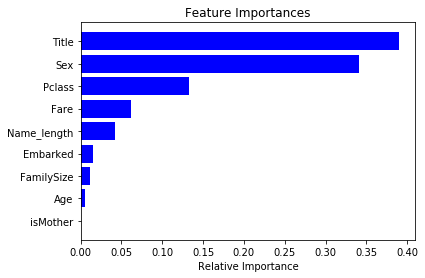

In [14]:
features = train_df.columns.values
features = np.delete(features, np.where(features == "Survived"))
importances = random_forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

/Users/MasatoraAtarashi/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


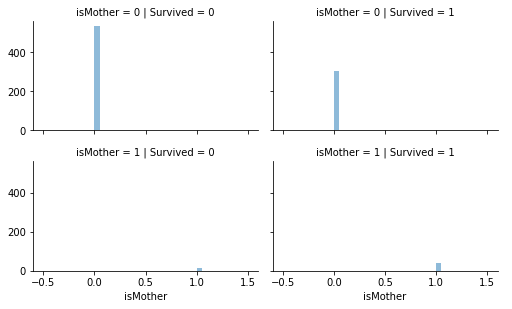

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='isMother', size=2.2, aspect=1.6)
grid.map(plt.hist, 'isMother', alpha=.5, bins=20)
grid.add_legend();